# 基本的な分類：衣類の画像を分類します

このガイドでは、スニーカーやシャツなどの衣類の画像を分類するためのニューラルネットワークモデルをトレーニングします。すべての詳細を理解していなくても大丈夫です。これは、完全なTensorFlowプログラムのペースの速い概要であり、詳細が説明されています。

このガイドでは、高レベルAPIであるtf.kerasを使用して、TensorFlowでモデルを構築およびトレーニングします。

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')
print(tf.__version__)
import warnings #ワーニング関連のモジュール？
warnings.filterwarnings('ignore') #ワーニングが消える？


2.6.0


## FashionMNISTデータセットをインポートする

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [3]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

## 各画像は単一のラベルにマッピングされます。クラス名はデータセットに含まれていないため、後で画像をプロットするときに使用するために、ここに保存します。

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## データを調べる

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
len(train_labels)

60000

In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
test_images.shape

(10000, 28, 28)

## データを前処理する

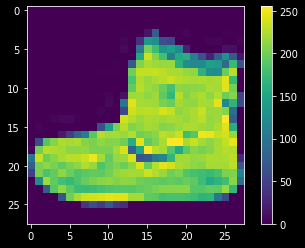

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

## スケーリング

In [10]:
train_images = train_images /255
test_images = test_images /255

データが正しい形式であり、ネットワークを構築してトレーニングする準備ができていることを確認するために、トレーニングセットの最初の25枚の画像を表示し、各画像の下にクラス名を表示しましょう。

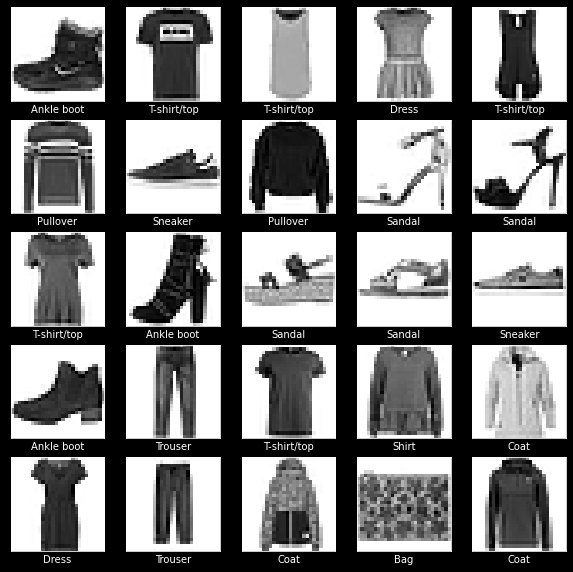

In [11]:
plt.figure(figsize = (10,10))
for i in range(25):
    plt.style.use('dark_background')
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
    
plt.show()

## モデルを構築する

## レイヤーを設定する

ディープラーニングのほとんどは、単純なレイヤーを連鎖させることで構成されています。などのほとんどのレイヤーには、tf.keras.layers.Denseトレーニング中に学習されるパラメーターがあります。

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10)
])

2021-09-04 11:43:12.328577: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


最初のレイヤーtf.keras.layers.Flattenは、画像の形式を2次元配列（28 x 28ピクセル）から1次元配列（28 * 28 = 784ピクセル）に変換します

ピクセルが平坦化された後、ネットワークは2つのtf.keras.layers.Denseレイヤーのシーケンスで構成されます

最初のDense層には128個のノード（またはニューロン）があります。2番目（および最後）のレイヤーは、長さが10のロジット配列を返します。各ノードには、現在の画像が10のクラスの1つに属していることを示すスコアが含まれています。

## モデルをコンパイルする

- 損失関数-これは、トレーニング中のモデルの正確さを測定します。この関数を最小化して、モデルを正しい方向に「操縦」する必要があります。
- オプティマイザー-これは、モデルが表示するデータとその損失関数に基づいてモデルが更新される方法です。
- メトリック-トレーニングとテストの手順を監視するために使用されます。次の例では、正確に分類された画像の割合である精度を使用しています。

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## モデルをトレーニングする

ニューラルネットワークモデルのトレーニングには、次の手順が必要です。

- トレーニングデータをモデルにフィードします。この例では、トレーニングデータはtrain_imagesとtrain_labels配列にあります。
- モデルは、画像とラベルを関連付けることを学習します。
- モデルに、テストセット（この例ではtest_images配列）に関する予測を行うように依頼します。
- 予測がtest_labels配列のラベルと一致することを確認します。

### モデルにフィード

トレーニングを開始するには、model.fitメソッドを呼び出します。これは、モデルをトレーニングデータに「適合」させるために呼び出されます。

In [14]:
model.fit(train_images,train_labels,epochs=10)

2021-09-04 11:43:12.831862: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
1875/1875 [==============================] - 2s 991us/step - loss: 0.4926 - accuracy: 0.8267
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3705 - accuracy: 0.8660
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3352 - accuracy: 0.8783
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3090 - accuracy: 0.8875
Epoch 5/10
1875/1875 [==============================] - 2s 997us/step - loss: 0.2923 - accuracy: 0.8927
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2752 - accuracy: 0.8990
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2642 - accuracy: 0.9020
Epoch 8/10
1875/1875 [==============================] - 2s 927us/step - loss: 0.2532 - accuracy: 0.9057
Epoch 9/10
1875/1875 [==============================] - 2s 950us/step - loss: 0.2439 - accuracy: 0.9091
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - los

## 精度を評価する

次に、モデルがテストデータセットでどのように機能するかを比較します。

In [15]:
test_loss,test_acc = model.evaluate(test_images,test_labels,verbose=2)

print('\nTest accuracy:',test_acc)

313/313 - 0s - loss: 0.3310 - accuracy: 0.8872

Test accuracy: 0.8871999979019165


テストデータセットの精度は、トレーニングデータセットの精度よりも少し低いことがわかりました。トレーニングの精度とテストの精度の間のこのギャップは、過剰適合を表しています。過剰適合は、機械学習モデルが、トレーニングデータよりも、以前は見られなかった新しい入力でパフォーマンスが低下した場合に発生します。過剰適合モデルは、トレーニングデータセットのノイズと詳細を「記憶」し、新しいデータでのモデルのパフォーマンスに悪影響を及ぼします。

## 予測を行います

トレーニングされたモデルを使用して、いくつかの画像に関する予測を行うことができます。モデルの線形出力、ロジット。ソフトマックス層をアタッチして、ロジットを解釈しやすい確率に変換します。

In [16]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [17]:
predictions = probability_model.predict(test_images)

ここで、モデルはテストセット内の各画像のラベルを予測しました。最初の予測を見てみましょう

In [18]:
predictions[0]

array([9.1903381e-08, 2.5711683e-12, 9.1506118e-09, 3.8096930e-09,
       7.9435960e-09, 4.6469118e-05, 7.4403806e-07, 4.0751524e-02,
       2.9140827e-08, 9.5920110e-01], dtype=float32)

予測は10個の数値の配列です。これらは、画像が10種類の衣料品のそれぞれに対応しているというモデルの「自信」を表しています。どのラベルが最も高い信頼値を持っているかを確認できます。

In [19]:
np.argmax(predictions[0])

9

In [20]:
test_labels[0]

9

In [21]:
def plot_image(i,predictions_array,true_label,img):
    true_label,img = true_label[i],img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img,cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel("{}{:2.0f}%({})".format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[true_label]),
               color = color)

def plot_value_array(i,predictions_array,true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10),predictions_array,color="#777777")
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

## 予測を検証する

トレーニングされたモデルを使用して、いくつかの画像に関する予測を行うことができます。

0番目の画像、予測、および予測配列を見てみましょう。正しい予測ラベルは青で、間違った予測ラベルは赤です。数値は、予測されたラベルのパーセンテージ（100から）を示します。

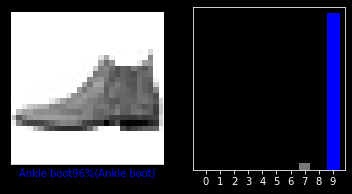

In [22]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions[i],test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions[i],test_labels)
plt.show()

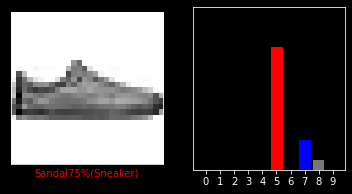

In [23]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions[i],test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions[i],test_labels)
plt.show()

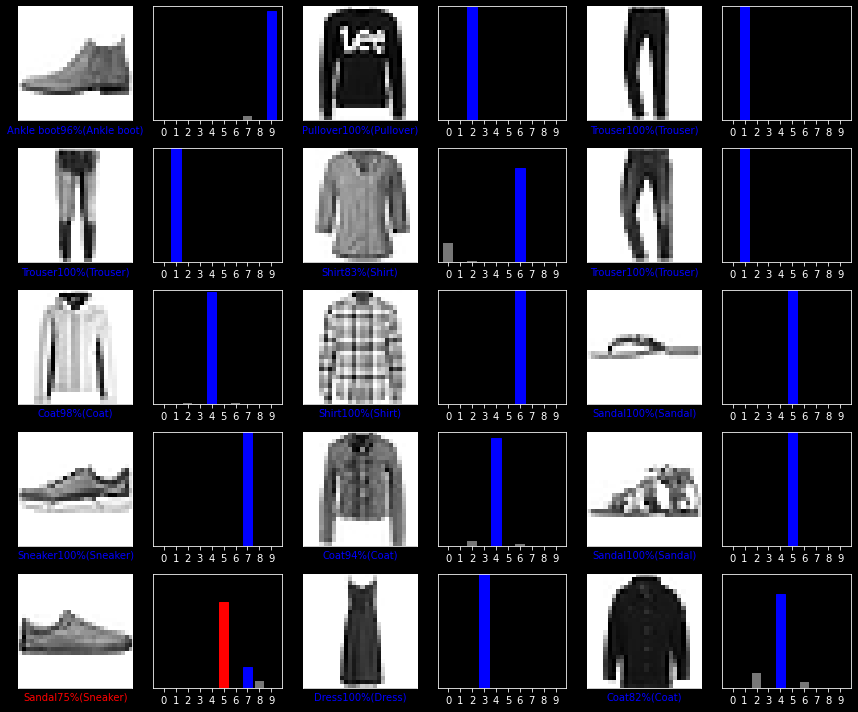

In [24]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## 訓練されたモデルを使用する

In [25]:
# Grab an image from the test dataset.
img = test_images[1]
print(img.shape)

(28, 28)


tf.kerasモデルは、例のバッチまたはコレクションを一度に予測するように最適化されています。したがって、単一の画像を使用している場合でも、それをリストに追加する必要があります。

In [26]:
# Add the image to a batch where it's the only member
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


次に、この画像の正しいラベルを予測します。

In [27]:
predictions_single = probability_model.predict(img)
print(predictions_single)

[[5.3160973e-05 4.0181072e-13 9.9899906e-01 2.5436209e-10 6.8171887e-04
  2.8747856e-16 2.6610339e-04 1.6363033e-18 9.4848462e-10 5.3032966e-16]]


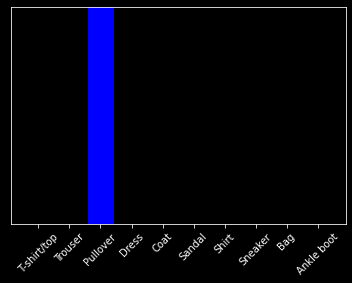

In [28]:
plot_value_array(1,predictions_single[0],test_labels)
_ = plt.xticks(range(10),class_names,rotation=45)
plt.show()

tf.keras.Model.predictリストのリストを返します—データのバッチ内の画像ごとに1つのリスト。バッチ内の（唯一の）画像の予測を取得します。

In [29]:
np.argmax(predictions_single[0])

2